In [1]:
# connect to google drive. (google it how to use it if you don't know already)
# this code cell will ask for permission of your google account. 
# give access and refresh folder icon under files to see the change.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# use this cell if you are uploading data directory (dir) instead of zip file
# NOTE: uploading unzipped file could be fatal in google colab because of random i/o latency.
# uploading zip file is the safest option.
# try to put the dataset in top file directory i.e. under gdrive/drive to reduce i/o errors.
# e.g. putting data.zip under gdrive/project/thesis/lip_reading/data.zip will take more time for i/o operation than just gdrive/data.zip.
# you can create a secondary new google account just for your thesis to avoid these type of problems. 

# !rmdir -rf data # remove dir named data
# !mkdir data # create dir named data
# !rm -rf /content/data # delete a non empty directory.

In [3]:
!unzip /content/drive/MyDrive/lip_reading/data.zip # unzipping dataset

Archive:  /content/drive/MyDrive/lip_reading/data.zip
   creating: content/data/
 extracting: content/data/test.zip   
 extracting: content/data/train.zip  
  inflating: content/data/sample_submission.csv  
  inflating: content/data/val.csv    
 extracting: content/data/val.zip    
  inflating: content/data/train.csv  
  inflating: content/data/vocabulary.txt  


In [4]:
# unzipping internal zips
!unzip /content/content/data/train.zip -d /content/content/data/train > /dev/null
!unzip /content/content/data/val.zip -d /content/content/data/val > /dev/null
!unzip /content/content/data/test.zip -d /content/content/data/test > /dev/null

In [5]:
# as the zips cost small amount of storage so we are not deleting it.
# but keep your eyes on the top right corner whether the disk and ram are filling up or not.

# to delete zips use !rm commands as above after completing unzipping to save storage for later operations (ops)
# !rm /content/content/data/test.zip
# !rm /content/content/data/train.zip
# !rm /content/content/data/val.zip

In [6]:
# we will use some external libraries to handle our special category (catg) of data.
# (1) MediaPipe, (2) protobuf3-to-dict 

# MediaPipe, ref - https://google.github.io/mediapipe/getting_started/python.html
# open source library (lib) by google, it got some useful features for tasks like:
# - face detetecion, https://en.wikipedia.org/wiki/Face_detection
# - keypoints detection, https://paperswithcode.com/task/keypoint-detection
# - pose estimation, https://paperswithcode.com/task/pose-estimation

# NOTE: paperswithcode is an important search space for researchers, try to roam this site.

# protobuf3-to-dict, ref - https://pypi.org/project/protobuf3-to-dict/
# it will be useful for us as it will help MediaPipe output to convert into a dictionary format.
# we will learn about its' usefulness in upcoming cells 

In [7]:
!pip install mediapipe # version installed -0.8.10.1
!pip install protobuf3-to-dict # version installed 0.1.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 32.9 MB 1.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for protobuf3-to-dict: filename=protobuf3_to_dict-0.1.5-py3-none-any.whl size=4030 sha256=64738d54da7d4f5dab05e3cce9ebdddc89b8ea627fa9ae0fbd8595ed13562127
  Stored in directory: /root/.cache/pip/wheels/ce/a0/8b/995ce2fbaf0e9fe7eb91da84e99e84d1b35cfaa555f2b8f1c7
Successfully built protobuf3-to-dict


In [8]:
import pandas as pd

# PATH SETUP
train_imgs_path = '/content/content/data/train'
val_imgs_path = '/content/content/data/val/'
test_imgs_path = '/content/content/data/test/'
vocabulary_path = '/content/content/data/vocabulary.txt'

# reading as pandas dataframe (df) as almost all AI related library expect datas in form of pandas dataframe 
# i.e. in scientific computing pandas dataframe is common. structure of df is similar to a SQL table. 
train_df = pd.read_csv("/content/content/data/train.csv")
val_df = pd.read_csv("/content/content/data/val.csv")

In [9]:
# how many vocabularies (vocabs)
len(open(vocabulary_path).readlines())

400

In [10]:
# lets see 10 values from the initial position of the dataset
train_df.head(10)

,file_name,word
0,0.mp4,hypothesize
1,1.mp4,research
2,2.mp4,determine
3,3.mp4,counsel
4,4.mp4,bless
5,5.mp4,shake
6,6.mp4,park
7,7.mp4,compare
8,8.mp4,wait
9,9.mp4,nominate


In [11]:
# checking the dimension (dim/dims) of the train data

# output (o/p) means we have 3000 row and 2 columns
print(train_df.shape)

# (o/p) means we have 500 row and 2 columns
print(val_df.shape)

# so the split of train and val set is 6:1

(3000, 2)
(500, 2)


In [12]:
from base64 import b64encode
from IPython.display import HTML

# lets see a sample data
# ref - https://stackoverflow.com/a/61569761

def show_video(video_path):
  """Function (func) to show video by path"""

  mp4 = open(video_path,'rb').read()
  decoded_vid = "data:video/mp4;base64," + b64encode(mp4).decode()
  return HTML(f'<video width=400 controls><source src={decoded_vid} type="video/mp4"></video>')

In [13]:
print(train_df['word'][0])
print(train_df['file_name'][0])
show_video("/content/content/data/train/0.mp4")

hypothesize
0.mp4


In [14]:
print(train_df['word'][1])
print(train_df['file_name'][1])
show_video("/content/content/data/train/1.mp4")

research
1.mp4


In [15]:
print(train_df['word'][500])
print(train_df['file_name'][500])
show_video("/content/content/data/train/500.mp4")

scatter
500.mp4


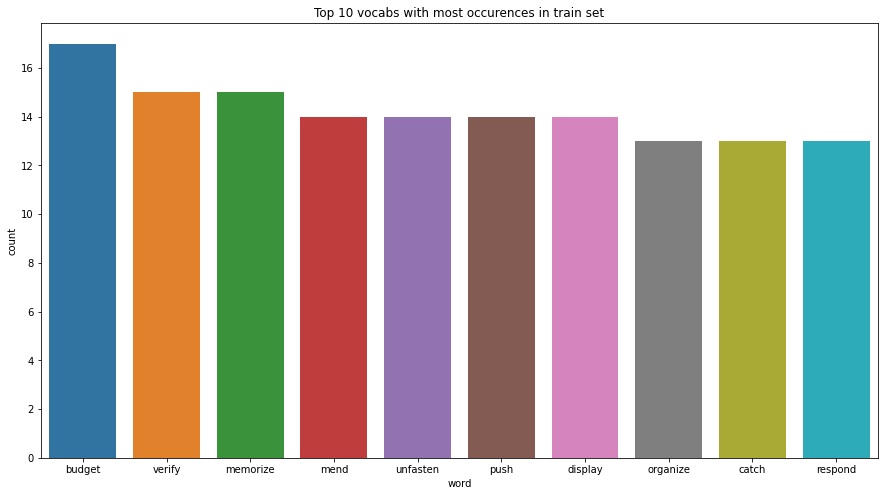

In [16]:
import matplotlib.pyplot as plt # its a plotting library
import seaborn as sns # this is another plotting library
# combining them make plotting appealing. :D :D :D

# class (vocabulary distribution for top 10 data)
plt.figure(figsize=(15,8))
plt.title("Top 10 vocabs with most occurences in train set")
sns.countplot(x=train_df['word'], order=train_df['word'].value_counts().iloc[:10].index, orient="h")
plt.show()

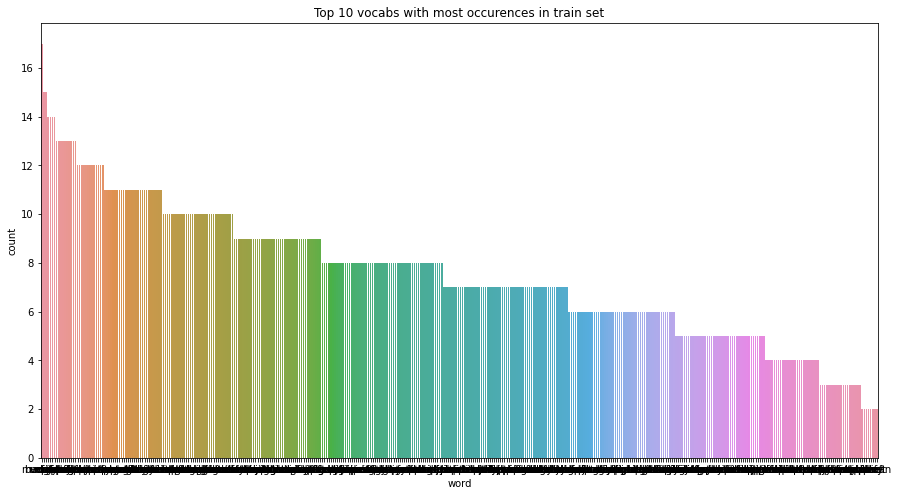

In [17]:
# full vocab list distribution.
# It will take some time to render (and this distribution is kind of useless)

plt.figure(figsize=(15,8))
plt.title("Top 10 vocabs with most occurences in train set")
sns.countplot(x=train_df['word'], order=train_df['word'].value_counts().iloc[:400].index, orient="h")
plt.show()

In [18]:
# let's do some basic data preprocessing. 
# these might not be helpful for the dataset we are currently having,
# but it will be useful for our bengali custom dataset

# targets: (upcoming cells have discussion.)
# 1- removing invalid data points and video samples that are unreadable.
# 2- reading vocab files and label encoding it using sklearn labelEncoder then add to a new col in the df.
# 3- adding complete video path as a new column.
# 4- generating feature set by generating the corresponding facial mesh using MediaPipe.

In [19]:
import os 

# 1- removing invalid data points and video samples that are unreadable.

# train removal
train_files = os.listdir(train_imgs_path)
df = train_df
for file_name in train_df['file_name']:
    if file_name not in train_files:
        df=df.drop(df[df['file_name']==file_name].index)   
train_df = df
print("cleaned train set   :", train_df.shape)

# val removal
val_files = os.listdir(val_imgs_path)
df = val_df
for file_name in val_df['file_name']:
    if file_name not in val_files:
        df=df.drop(df[df['file_name']==file_name].index)
val_df = df
print("cleaned val set :", val_df.shape)

# it seems like the dataset is already cleaned for us. but we can make mistakes
# while creating our own, so it will help on that case.

cleaned train set   : (3000, 2)
cleaned val set : (500, 2)


In [20]:
# Reducing the number of samples to train,
# i.e. if any word or vocab is in the dataset but not in vocab list or vice versa we can find that imposter from here.
# accidentaly we might do a typo while creating the dataset, so mismatch with the count will help us to identify that.

with open(vocabulary_path, 'r') as vocab_file:
  vocab_list = vocab_file.read().splitlines()
  
train_df = train_df[train_df['word'].isin(vocab_list)] 
val_df = val_df[val_df['word'].isin(vocab_list)] 
train_df.shape

# it seems like everything is fine.

(3000, 2)

In [21]:
from sklearn import preprocessing

# 2- reading vocab files and label encoding it using sklearn labelEncoder then add to a new col in the df.
# label encoding - reading strings is costly so we are encoding with a unique number as computer prefers to work with number.

le = preprocessing.LabelEncoder()
le.fit(vocab_list)

train_df['encoded_label'] = le.transform(train_df['word'])
val_df['encoded_label'] = le.transform(val_df['word'])

train_df.head(5)

# corresponding encoded label for a word/vocab shown in the table below.

,file_name,word,encoded_label
0,0.mp4,hypothesize,176
1,1.mp4,research,291
2,2.mp4,determine,100
3,3.mp4,counsel,83
4,4.mp4,bless,36


In [22]:
# Add video path to the dataset. 
# it will make our work easier as we can just save an reuse 
# this two df train_df and val_df for further works and dont have 
# to do the previous works again and again.

train_df['video_path'] = train_df['file_name'].apply(lambda file_path : os.path.join(train_imgs_path, file_path))
val_df['video_path'] = val_df['file_name'].apply(lambda file_path : os.path.join(val_imgs_path, file_path))

train_df.head(5)

,file_name,word,encoded_label,video_path
0,0.mp4,hypothesize,176,/content/content/data/train/0.mp4
1,1.mp4,research,291,/content/content/data/train/1.mp4
2,2.mp4,determine,100,/content/content/data/train/2.mp4
3,3.mp4,counsel,83,/content/content/data/train/3.mp4
4,4.mp4,bless,36,/content/content/data/train/4.mp4


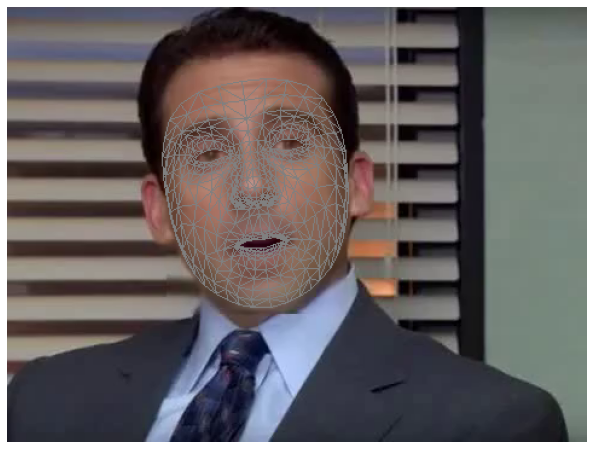

In [29]:
# GENERATING FACIAL MESH
# visualizing single frame with face mesh
# reference - https://colab.research.google.com/drive/1FCxIsJS9i58uAsgsLFqDwFmiPO14Z2Hd#scrollTo=BAivyQ_xOtFp

import cv2
import mediapipe as mp


cap = cv2.VideoCapture(train_df['video_path'][15])
mp_face_mesh = mp.solutions.face_mesh
mp_drawing_styles = mp.solutions.drawing_styles
mp_drawing = mp.solutions.drawing_utils


plt.figure(figsize=(15,8))

with mp_face_mesh.FaceMesh(
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as face_mesh:
  while cap.isOpened():

    success, image = cap.read()

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(image)

    # Draw the face mesh annotations on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    if results.multi_face_landmarks:
      for face_landmarks in results.multi_face_landmarks:
        mp_drawing.draw_landmarks(
            image=image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_TESSELATION,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles
            .get_default_face_mesh_tesselation_style())
    
    break

plt.axis('off')
plt.imshow(cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_RGB2BGR))
cap.release()

In [31]:
# Function to generate facial mesh across all the frames of input video 

import numpy as np
from protobuf_to_dict import protobuf_to_dict


def gen_keypoint(video_path):

  milliseconds = 1000
  keypoints_list = []
  mp_face_mesh = mp.solutions.face_mesh
  cap = cv2.VideoCapture(video_path) # Reading the video

  with mp_face_mesh.FaceMesh(
      max_num_faces=1,
      refine_landmarks=True,
      min_detection_confidence=0.5,
      min_tracking_confidence=0.5,
  ) as face_mesh:
      while True:
          success, image = cap.read() # Reading each frame
          if not success:
              break
            
          # preprocessing the frame
          h, w, _ = image.shape
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
          results = face_mesh.process(image)

          # if face mesh generated, convert it to json and append it in a list
          if results.multi_face_landmarks:
              for face_landmarks in results.multi_face_landmarks:
                  face_landmarks_json = protobuf_to_dict(face_landmarks)
                  keypoint = []
                  for landmark in face_landmarks_json["landmark"]:
                      keypoint.append([landmark["x"]*w, landmark["y"]*h])
                  keypoints_list.append(keypoint)


  keypoints_list = np.asarray(keypoints_list) 

  # Converting the keypoints list to 1d array and padding it to same size across all samples
  keypoints_list = keypoints_list.flatten()
  keypoints_list = np.pad(keypoints_list, (0,25000-keypoints_list.shape[0]))

  return keypoints_list


# Test
keypoints = gen_keypoint("/content/content/data/train/2.mp4")
print(keypoints.shape)
del keypoints

(25000,)


In [32]:
# generating keypoints for all samples

from tqdm.notebook import tqdm

# Function to take a dataframe and generate facial mask across all samples 
def gen_df_keypoints(df):
  all_keypoints = []
  for video_path in tqdm(df['video_path']):
    keypoint = gen_keypoint(video_path)
    all_keypoints.append(keypoint)  

  return np.asarray(all_keypoints)

# Generating the features for train & validation set. 
training_keypoints = gen_df_keypoints(train_df)
val_keypoints = gen_df_keypoints(val_df)

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

In [33]:
training_keypoints.shape

(3000, 25000)

In [34]:
# build model

from sklearn.ensemble import RandomForestClassifier

# ref - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# goto the sklearns page, tune parameters, record outcomes
 
clf = RandomForestClassifier()

In [35]:
# train model
clf.fit(training_keypoints, train_df['encoded_label'].values)

RandomForestClassifier()

In [36]:
# evaulate model
clf.score(val_keypoints, val_df['encoded_label'].values)

0.732

In [37]:
# Making predictions on validation data

predictions = clf.predict(val_keypoints)
y_val_pred = predictions
y_true_val = val_df['encoded_label'].values

In [38]:
# evaluating prediction on mentioned metrics
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import accuracy_score,f1_score

print('Accuracy :', round(accuracy_score(y_true_val, y_val_pred)*100,3),"%")
print('F1 score :', round(f1_score(y_true_val, y_val_pred, average='weighted')*100,3),"%")
print('Recall   :', round(recall_score(y_true_val, y_val_pred, average='weighted')*100,3),"%")
print('Precision:', round(precision_score(y_true_val, y_val_pred, average='weighted')*100,3),"%")

Accuracy : 73.2 %
F1 score : 72.177 %
Recall   : 73.2 %
Precision: 76.377 %


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
# TESTING

test_format_df = pd.read_csv("/content/content/data/sample_submission.csv")
print(test_format_df.shape)

preprocessed_test_format_df = test_format_df.copy(deep=True) 

preprocessed_test_format_df['encoded_label'] = le.transform(preprocessed_test_format_df['word'])
preprocessed_test_format_df['video_path'] = preprocessed_test_format_df['file_name'].apply(lambda file_path : os.path.join(test_imgs_path, file_path))

# Generating the keypoints for submission dataframe
testing_keypoints = gen_df_keypoints(preprocessed_test_format_df)

(1500, 2)


  0%|          | 0/1500 [00:00<?, ?it/s]

In [41]:
test_file_prediction = clf.predict(testing_keypoints)

In [42]:
test_format_df['word'] = le.inverse_transform(test_file_prediction)
test_format_df

,file_name,word
0,0.mp4,sin
1,1.mp4,prick
2,2.mp4,fool
3,3.mp4,scrub
4,4.mp4,forecast
...,...,...
1495,1495.mp4,damage
1496,1496.mp4,form
1497,1497.mp4,crawl
1498,1498.mp4,research
